# LEAD SCORING CASE STUDY

## Table of Contents
1. Importing Libraries
2. Importing Dataset
3. Data Understanding & Cleaning
4. Exploratory Data Analysis (Variables Inspection)
5. Data Preparation
6. Model Building (Logistic Regression)
7. Model Evaluation (Logistic Regression Metrics)
8. Model Testing
9. Model Inference
10. Summary (Recommendation)

## 1. Importing the Libraries

In [258]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns

# Importing Statsmodel
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.feature_selection import RFE

# Supressing Warnings
import warnings
warnings.filterwarnings('ignore') 

## 2. Importing Dataset

In [259]:
# Importing Dataset
leads = pd.read_csv('Leads.csv')

## 3. Data Understanding & Cleaning

### Data Understanding

In [260]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Shape

In [261]:
# Data Shape
leads.shape

(9240, 37)

### Data Information

In [262]:
# Data Information
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Insight
- All the values in every column are in correct format (Except binary type of categorical columns which will be handeled later).

### Data Description

In [263]:
# Data Description
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Percentage (%) of Null Values in Each Column

In [264]:
leads.isna().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

-  Many columns have null values.

### Converting "Select" values of all the Columns to Null

In [265]:
leads = leads.replace('Select', np.nan)

- As provided in the problem statement many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.
- Reason for this may be, there was an option to be selected while filling up the form which it was not selected and kept as default. So, here it is treated as null values.


### Dealing with Null Values
### Dropping columns with null values >40%

In [266]:
# Dropping columns with null values >40%
col_null_40 = leads.columns[leads.isna().mean()*100>40]
leads.drop(columns=col_null_40, inplace = True)

In [267]:
leads.isna().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

- Columns with null values >40% are removed

### Imputing the null values for numerical columns (Excluding binary columns having 0 and 1)

In [268]:
# Imputing the null values for numerical columns (Excluding Binary columns having 0 and 1)
num_cols = ['Lead Number', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
leads[num_cols].isna().mean()*100

Lead Number                    0.000000
TotalVisits                    1.482684
Total Time Spent on Website    0.000000
Page Views Per Visit           1.482684
dtype: float64

- There are two columns ("TotalVisits", "Page Views Per Visit") with less % of null values. We can replace them with their Median values.

In [269]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Replacing null values of 'TotalVisits' & 'Page Views Per Visit' with their median value

In [270]:
leads['TotalVisits'] = leads['TotalVisits'].fillna(leads['TotalVisits'].median())
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median())

### Dealing null values of categorical columns (Including binary columns having 0 and 1)

In [271]:
cat_cols = [i for i in leads.columns if i not in num_cols]
na = leads[cat_cols].isna().mean()*100
na[na>0].sort_values()

Lead Source                                       0.389610
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Specialization                                   36.580087
City                                             39.707792
dtype: float64

#### Insight
- Lead Source: As the percentage of null value is less it can be imputed with mode.
- Last Activity: As the percentage of null value is less it can be imputed with mode.
- Let's look at the other categorical columns with null values in higher % soon.

### Imputing null values for 'Lead Source' and 'Last Activity'

In [272]:
leads['Lead Source'] = leads['Lead Source'].fillna(leads['Lead Source'].mode()[0])
leads['Last Activity'] = leads['Last Activity'].fillna(leads['Last Activity'].mode()[0])

### Value counts check & Imputation for other categorical columns with high % of null values

In [273]:
na = leads[cat_cols].isna().mean()*100
na[na>0].sort_values()

Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Specialization                                   36.580087
City                                             39.707792
dtype: float64

### Imputing null values for 'Country' column

In [274]:
leads['Country'].value_counts(normalize=True)*100
# Since 95% of the leads are coming from India (It holds high weightage in the column), we can impute the null values with 'India'
leads['Country'] = leads['Country'].fillna(leads['Country'].mode()[0])

In [275]:
na = leads[cat_cols].isna().mean()*100
na[na>0].sort_values()

What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Specialization                                   36.580087
City                                             39.707792
dtype: float64

### Imputing null values for 'What is your current occupation' column

In [276]:
leads['What is your current occupation'].value_counts(normalize=True)*100
# Since 85% of them are Unemployed (It holds high weightage in the column), we can impute the null values with 'Unemployed'
leads['What is your current occupation'] = leads['What is your current occupation'].fillna(leads['What is your current occupation'].mode()[0])

In [277]:
na = leads[cat_cols].isna().mean()*100
na[na>0].sort_values()

What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Specialization                                   36.580087
City                                             39.707792
dtype: float64

### Imputing the null values of 'What matters most to you in choosing a course' column

In [278]:
leads['What matters most to you in choosing a course'].value_counts(normalize=True)*100
# Since 99.9% of them have intention on 'Better Career Prospects' (It holds high weightage in the column), we can impute the null values with 'Better Career Prospects'
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].fillna(leads['What matters most to you in choosing a course'].mode()[0])

### Imputing the null values of 'Tags' column

In [279]:
leads['Tags'].value_counts(normalize=True)*100
# The categorical levels of this column are distributed diversely. Imputing the null valuues for this columns can damage the model accuracy. Hence, we will drop it.
leads = leads.drop(columns=['Tags'])

In [280]:
cat_cols.remove('Tags')
na = leads[cat_cols].isna().mean()*100
na[na>0].sort_values()

Specialization    36.580087
City              39.707792
dtype: float64

### Imputing the null values of 'Specialization' column

In [281]:
leads['Specialization'].value_counts(normalize=True)*100
# Though the columns categorical levels are highly diverse we cannot drop this as this can be an important metric. So we'll impute the null values with "Other" as this is a industry segements and not all industries are listed. Hence, we can use 'Other'
leads['Specialization'] = leads['Specialization'].fillna('Other')

In [282]:
na = leads[cat_cols].isna().mean()*100
na[na>0].sort_values()

City    39.707792
dtype: float64

### Imputing the null values of 'City' column

In [283]:
leads['City'].value_counts(normalize=True)*100
# This column has high % of null values (~40%) and hence can be dropped. Apart from 'Mumbai' most of other values are "Other" which also comprises of other top cities. So leads are comping from all over India and this dosent add much value to the model and also has high % of null values. So, we shall drop it.
leads = leads.drop(columns=['City'])

### Checking the null values

In [284]:
# Checking the null values
leads.isna().mean()*100
# No null values present

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [285]:
# Checking data shape
leads.shape

(9240, 28)

### Dropping other columns
-  'Prospect ID' and 'Lead Number' can be dropped as they reresent customer ID and cannot add any value to the model at the moment.

In [286]:
leads = leads.drop(columns=['Prospect ID', 'Lead Number'])
num_cols.remove('Lead Number')
cat_cols.remove('Prospect ID')

### Dropping the columns that has only 1 unique value

In [287]:
for i in leads.columns:
  if leads[i].nunique()==1:
    print(f"{i} = {1}")
  else:
    continue

Magazine = 1
Receive More Updates About Our Courses = 1
Update me on Supply Chain Content = 1
Get updates on DM Content = 1
I agree to pay the amount through cheque = 1


#### So lets drop these columns that has only 1 unique values

In [288]:
leads = leads.drop(columns=['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'])
for i in ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']:
  if i in cat_cols:
    cat_cols.remove(i)

### Let's not drop any other columns untill we do the EDA

## 4. Exploratory Data Analysis

- Plotting graphs to evaluate the required variables (Considering the target varibale 'Converted' in both categorical and numerical column for visualization for better understanding)

### Data Imbalance Check

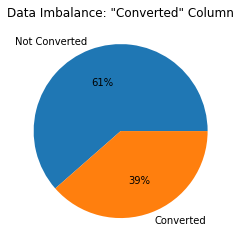

In [289]:
di = leads['Converted'].value_counts(normalize=True)*100
# Pie Plot
plt.pie(di, labels=['Not Converted', "Converted"], autopct='%.0f%%')
plt.title('Data Imbalance: "Converted" Column')
plt.show()

In [290]:
# Data Imabalance Ratio
di[0]/di[1]

1.5947767481044648

- Data Imbalance ratio (Not Converted to Converted) is 1.6:1.

### Univariate & Multivariate Categorical Analysis
#### Reframing the categorical columns

In [291]:
leads.info()
cat_cols=[]
for i in leads.columns:
  if i not in ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']:
    cat_cols.extend([i])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

### Function for plotting categorical columns

In [292]:
# Function for plotting categorical columns
def plot_cat(x,leads):
    plt.figure(figsize=[18,14])
    plt.subplot(3,3,1)
    sns.countplot(x=x, data=leads)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Categorical Level Density of {x} Column')
    plt.subplot(3,3,2)
    sns.countplot(x=x, palette=["red", "green"], data=leads, hue='Converted')
    plt.xticks(rotation=45, ha='right')
    plt.title('% of Conversion in Each Categorical Levels')
    plt.legend(labels=['Not Converted', 'Converted'], loc='upper right')
    plt.tight_layout()
    plt.show()


### Lead Origin

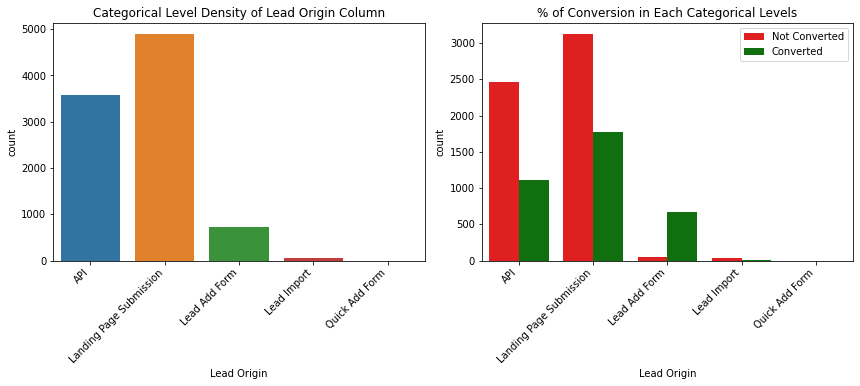

In [293]:
plot_cat('Lead Origin', leads)

#### Insight
- More Conversions are happening for Landng Page Submissions and Lead Add Form.

### Lead Source

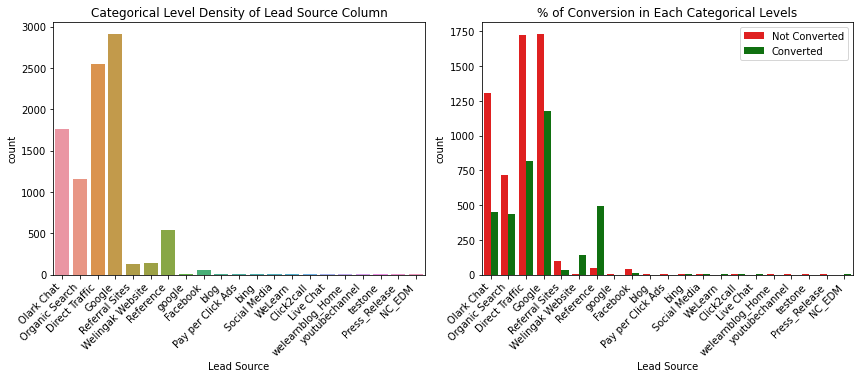

In [294]:
plot_cat('Lead Source', leads)

#### Insight
- More Conversions can be seen from the leads that came from sites like Google, Organic Search, Direct Traffic and Referrals.

### Do Not Email

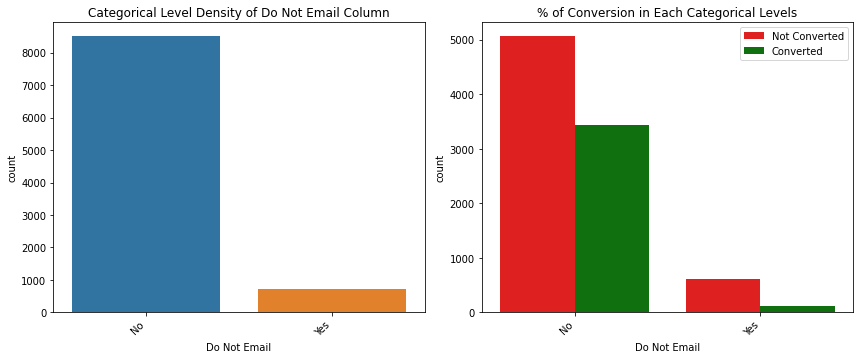

In [295]:
plot_cat('Do Not Email', leads)

#### Insight
- Not much insight was drawn here. Also dosen't make much sense as customers who have asked for not to email them have converted more.

### Do Not Call

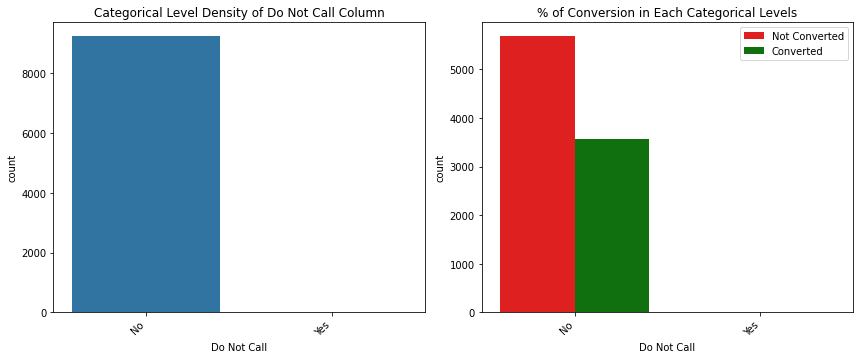

In [296]:
plot_cat('Do Not Call', leads)

#### Insight
- No insight drawn. Same case as the above 'Do No Email'.

### Last Activity

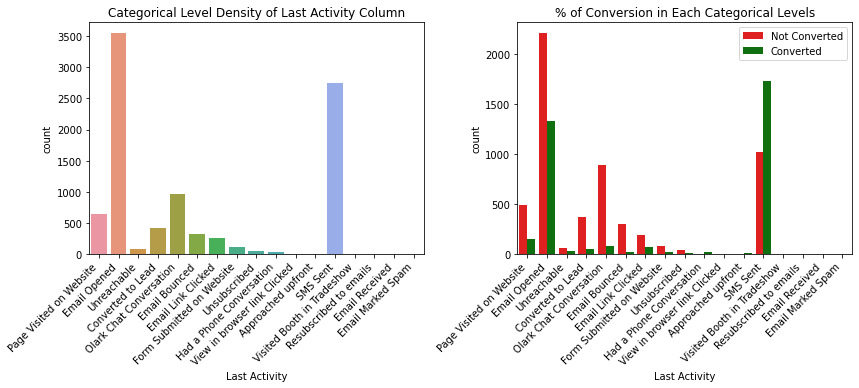

In [297]:
plot_cat('Last Activity', leads)

#### Insight
- High conversions were seen through SMS and Email marketing leads.

### Country

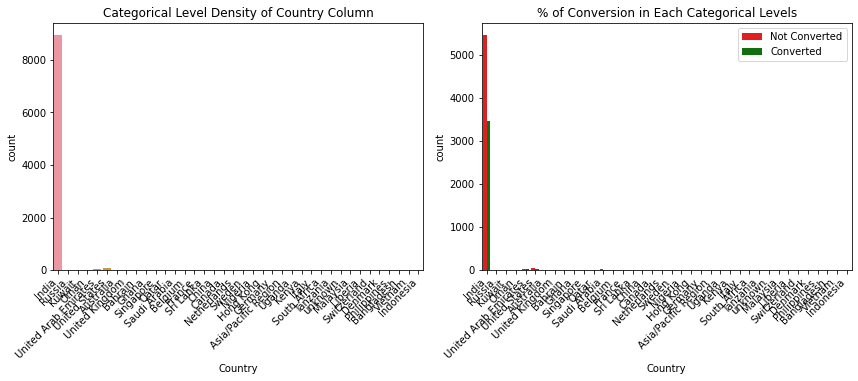

In [298]:
plot_cat('Country', leads)

#### Insight
- Poor Insight. Most of the leads are from India and we had seen this earlier as well.

### Specialization

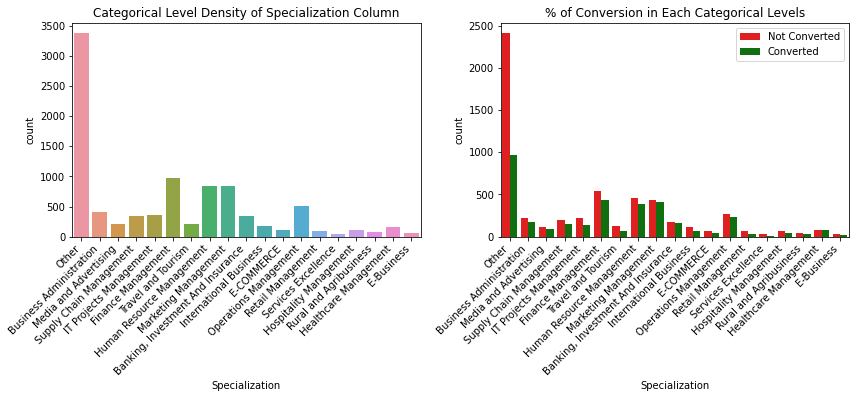

In [299]:
plot_cat('Specialization', leads)

#### Insight
- Mostly customers who worked in the Finance, HR, Marketing, Operations and Banking sector tend to convert more.

### What is your current occupation

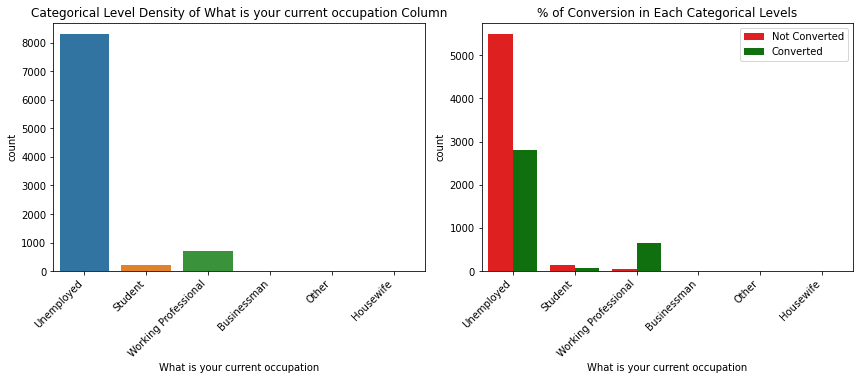

In [300]:
plot_cat('What is your current occupation', leads)

#### Insight
- Data Imbalance can be seen here. Considering only the unemployed segment, ~35% of them tend to convert.
- Working professions also have a good coversions rate.

### What matters most to you in choosing a course

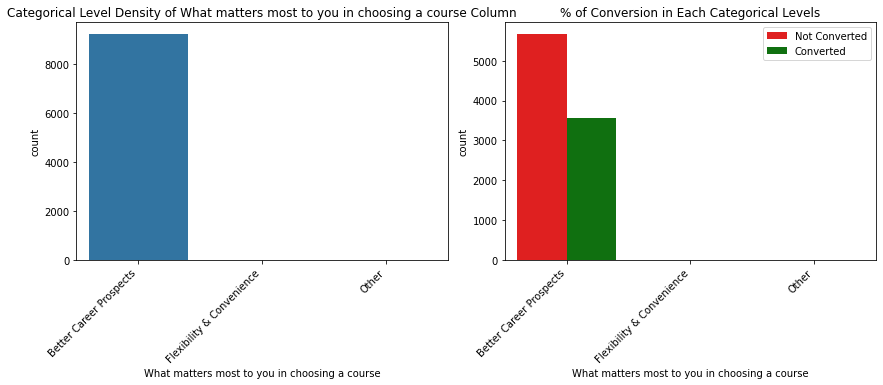

In [301]:
plot_cat('What matters most to you in choosing a course', leads)

#### Insight
- Customers who have choosen the option of "Better Career Prospects" for the career outcome tend to convert more.

### Search

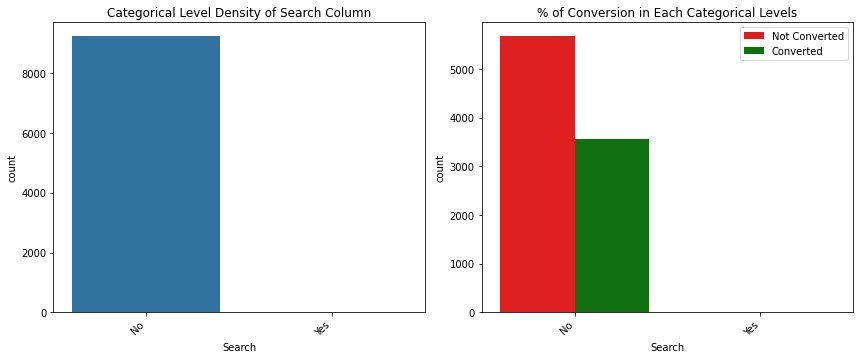

In [302]:
plot_cat('Search', leads)

#### Insight
- Data imbalance can be seen here. Not not much useful insight was drawn here.

### Newspaper Article

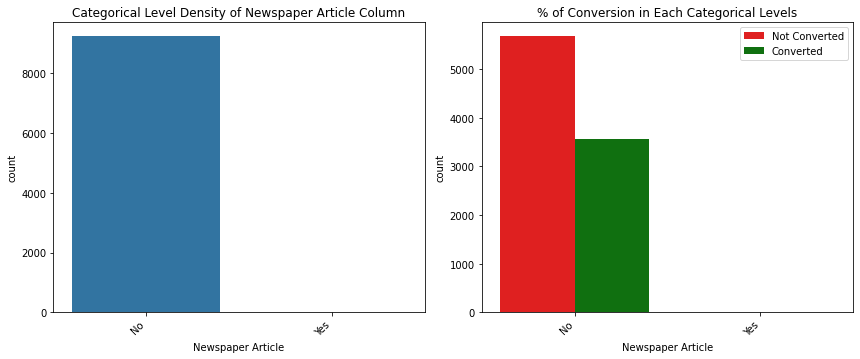

In [303]:
plot_cat('Newspaper Article', leads)

#### Insight
- Again Data imbalance can be seen here. Not not much useful insight was drawn here.

### Digital Advertisement

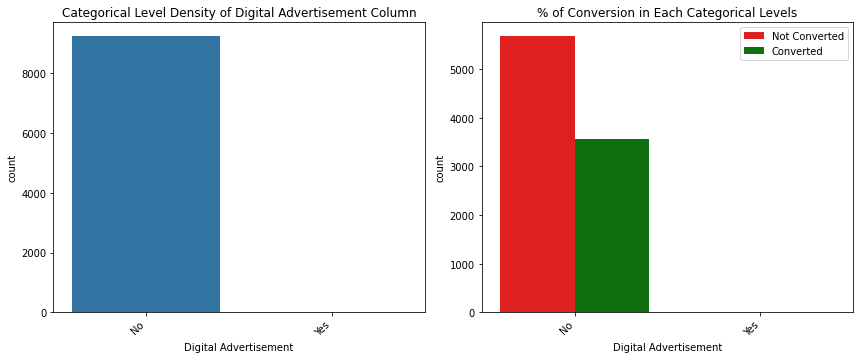

In [304]:
# Digital Advertisement
plot_cat('Digital Advertisement', leads)

#### Insight
- Again Data imbalance can be seen here. Not not much useful insight was drawn here.

### Through Recommendations

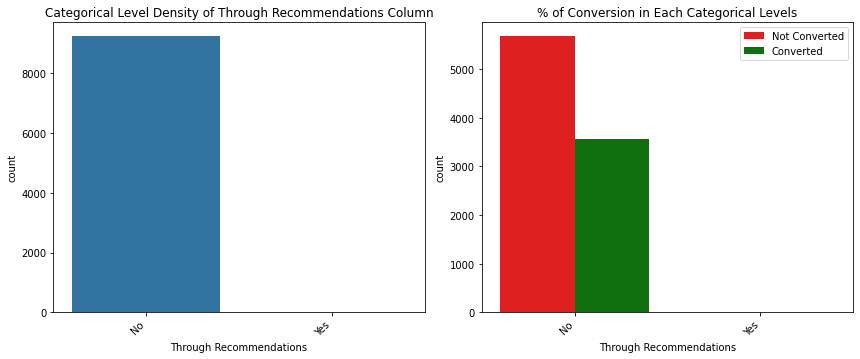

In [305]:
plot_cat('Through Recommendations', leads)

#### Insight
- Again Data imbalance can be seen here. Not not much useful insight was drawn here.

### A free copy of Mastering The Interview

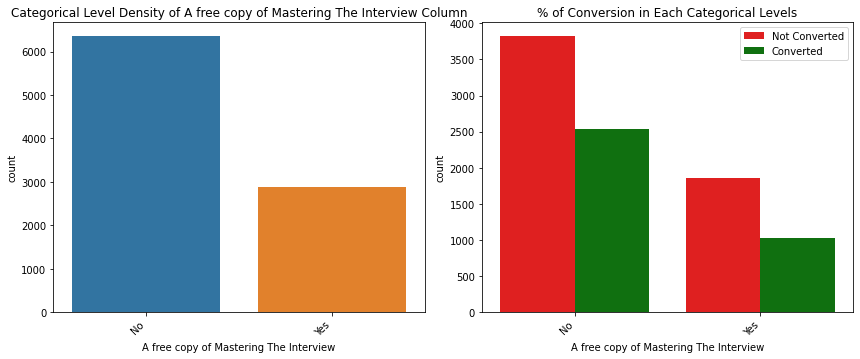

In [306]:
# A free copy of Mastering The Interview
plot_cat('A free copy of Mastering The Interview', leads)

#### Insight
- Conversion ratio is almost same for both the type of leads that have marked as No and Yes as response for the free copy of Mastering The Interview document.

### Last Notable Activity

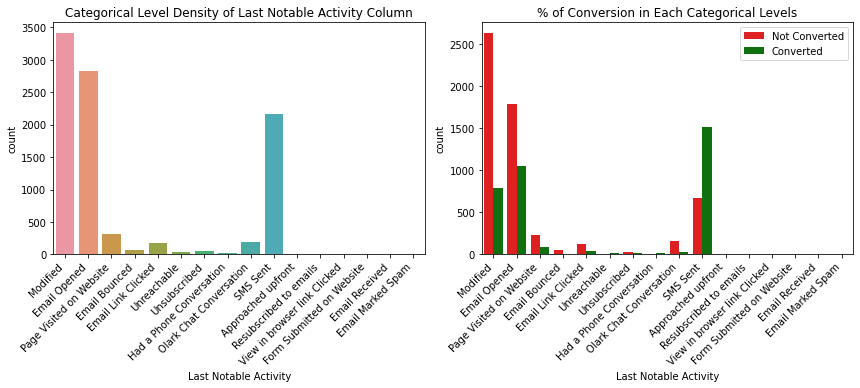

In [307]:
plot_cat('Last Notable Activity', leads) 
leads = leads.drop(columns=['Last Notable Activity'])

#### Insight
- Insights are same as that of the column Last Activity. High collinearity can be can be seen betweeh these two columns and this column can de dropped as it dosent add any value to the model and may overfit.

### What matters most to you in choosing a course

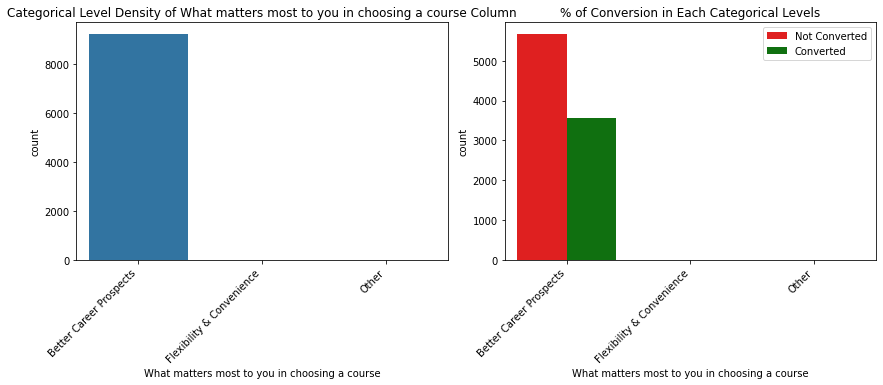

In [308]:
plot_cat('What matters most to you in choosing a course', leads)

#### Insight 
- High Data Imbalance.

### X Education Forums

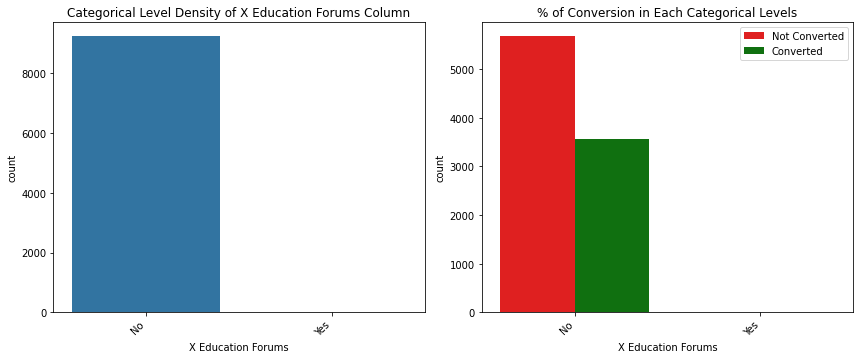

In [309]:
plot_cat('X Education Forums', leads)

#### Insight 
- High Data Imbalance.

### Newspaper

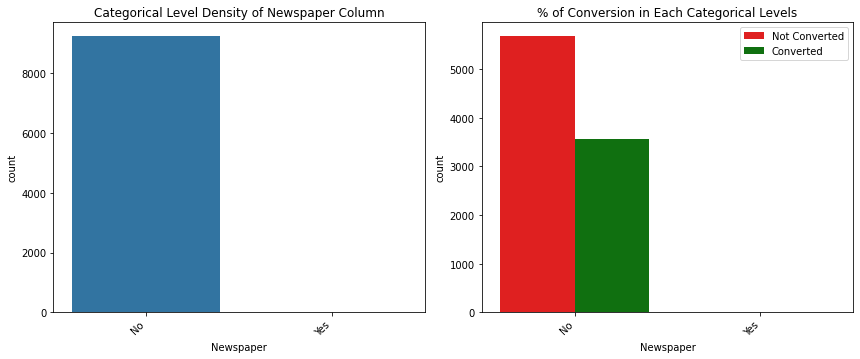

In [310]:
plot_cat('Newspaper', leads)

#### Insight 
- High Data Imbalance.

### Dropping the columns that have very high data imbalance and wont add much value to the model and may overfit.

In [311]:
leads = leads.drop(columns = ['Do Not Call', 'Country', 'Search', 'Newspaper Article', 'Digital Advertisement', 'Through Recommendations', 'What matters most to you in choosing a course', 'X Education Forums', 'Newspaper'])

In [312]:
# Leads Shape Check
leads.shape

(9240, 11)

### Univariate and Multivariate Numerical Analysis
#### Getting the numerical columns

In [313]:
num_cols = ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

### Numerical Columns Pair Plot

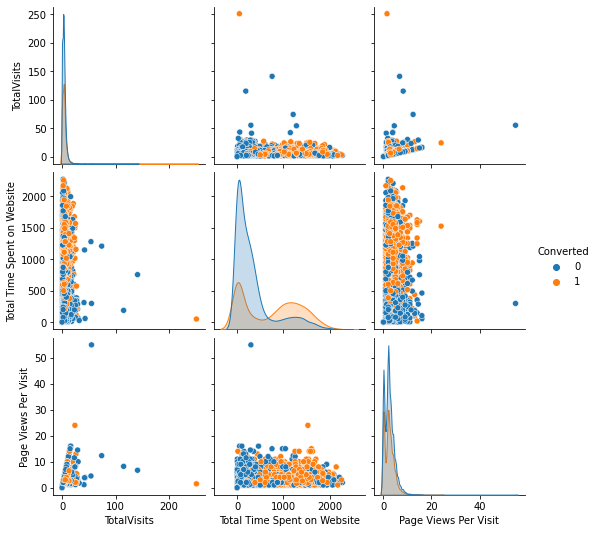

In [314]:
sns.pairplot(data=leads, hue='Converted')
plt.show()

#### Insight
- Leads tend to get converted who are likely to spend more time on website. If a customer spends more time on the website, he/she is researching a lot and is interested in the course.
- Lesser TotalVisits and Equal distribution of Total Time Spent on website.
- Page Views Per Visit is <20 no matter how long the user spend time on website.

### Correlation Check

<Axes: >

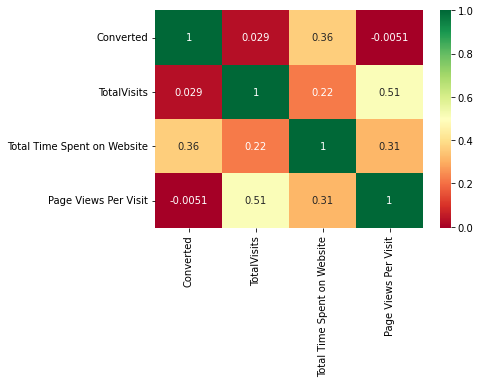

In [315]:
sns.heatmap(pd.DataFrame(leads[num_cols]).corr(), annot=True, cmap = 'RdYlGn')

#### Insight
- Some correlation can be seen between TotalVisits and Total Time Spent on Website. But can be retained as of now.

### Boxplot Analysis of the numerical columns

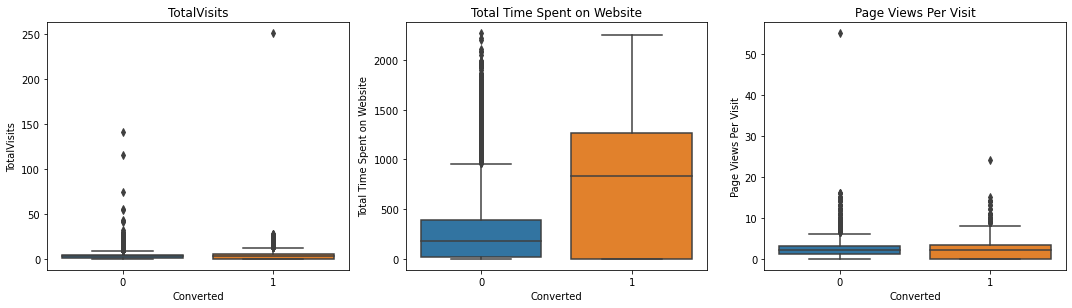

In [316]:
plt.figure(figsize=[15,12])
plt.subplot(3,3,1)
sns.boxplot(y='TotalVisits', x='Converted', data=leads)
plt.title('TotalVisits')
plt.subplot(3,3,2)
sns.boxplot(y='Total Time Spent on Website', x='Converted', data=leads)
plt.title('Total Time Spent on Website')
plt.subplot(3,3,3)
sns.boxplot(y='Page Views Per Visit', x='Converted', data=leads)
plt.title('Page Views Per Visit')
plt.tight_layout()
plt.show()

#### Insight
- High conversion rate can be seen on the leads which spend more time on the website before filling the lead form.
- Also there are outliers that needs to be treated.

### Outliers Treatment

In [317]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

#### Data shape before treatment

In [318]:
bleads=leads.shape

### Describing the data

In [319]:
leads.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 1])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
80%,1.000000,5.000000,1087.200000,4.000000
90%,1.000000,7.000000,1380.000000,5.000000


### Let's trim the columns upto 93 Percentile and check

In [320]:
leads = leads[leads['TotalVisits']<=leads['TotalVisits'].quantile(0.93)]

### Data Shape after treatment

In [321]:
aleads=leads.shape
aleads

(8609, 11)

### Boxplot

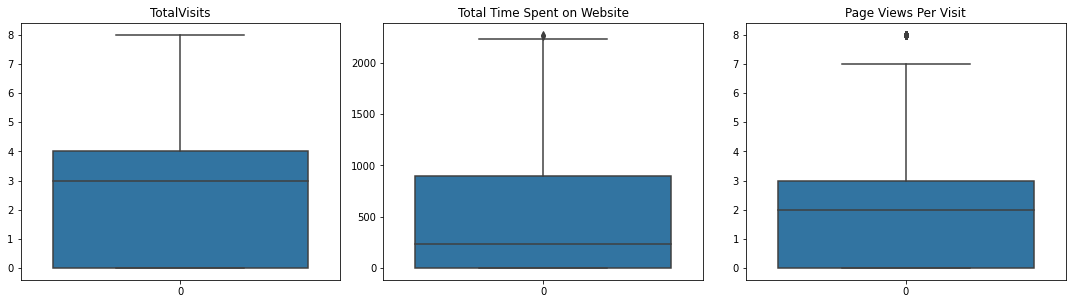

In [322]:
# Boxplot
plt.figure(figsize=[15,12])
plt.subplot(3,3,1)
sns.boxplot(leads['TotalVisits'])
plt.title('TotalVisits')
plt.subplot(3,3,2)
sns.boxplot(leads['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')
plt.subplot(3,3,3)
sns.boxplot(leads['Page Views Per Visit'])
plt.title('Page Views Per Visit')
plt.tight_layout()
plt.show()

#### Insight
- Most of the outliers are handeled. But we cannot reduce it completely as we may loose the data.

#### Percentage (%) Reduction in the Data after Outlier Treatment

In [323]:
round(100-(aleads[0]/bleads[0])*100,2)

6.83

## 5. Data Preparation

### Creating Dummy Variables
#### Data Information

In [324]:
# Data information
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8609 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8609 non-null   object 
 1   Lead Source                             8609 non-null   object 
 2   Do Not Email                            8609 non-null   object 
 3   Converted                               8609 non-null   int64  
 4   TotalVisits                             8609 non-null   float64
 5   Total Time Spent on Website             8609 non-null   int64  
 6   Page Views Per Visit                    8609 non-null   float64
 7   Last Activity                           8609 non-null   object 
 8   Specialization                          8609 non-null   object 
 9   What is your current occupation         8609 non-null   object 
 10  A free copy of Mastering The Interview  8609 non-null   obje

### Getting the unique values of all the columns

In [325]:
# Getting the unique values of all the columns
for i in leads.columns:
  print(i, leads[i].nunique())
  print

Lead Origin 5
Lead Source 21
Do Not Email 2
Converted 2
TotalVisits 9
Total Time Spent on Website 1679
Page Views Per Visit 23
Last Activity 17
Specialization 19
What is your current occupation 6
A free copy of Mastering The Interview 2


### Mapping Binary Categorical Columns to 0 and 1

In [326]:
# Mapping Binary Categorical Columns to 0 and 1
for i in ['Do Not Email', 'A free copy of Mastering The Interview']:
  leads[i]=leads[i].map({'No':0, 'Yes':1})

### Getting Dummy Variables

In [327]:
# Getting the dummy variables for the multilevel categorical columns
dummies=pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation']], drop_first=True)
leads = pd.concat([leads, dummies], axis=1)
leads = leads.drop(columns=['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation'])

- Now we have large number of columns. We shall eliminate them during model building using RFE and VIF analysis.

### Data Shape

In [328]:
# Data Shape
leads.shape

(8609, 69)

### Data Information

In [329]:
# Data Information
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8609 entries, 0 to 9239
Data columns (total 69 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          8609 non-null   int64  
 1   Converted                                             8609 non-null   int64  
 2   TotalVisits                                           8609 non-null   float64
 3   Total Time Spent on Website                           8609 non-null   int64  
 4   Page Views Per Visit                                  8609 non-null   float64
 5   A free copy of Mastering The Interview                8609 non-null   int64  
 6   Lead Origin_Landing Page Submission                   8609 non-null   uint8  
 7   Lead Origin_Lead Add Form                             8609 non-null   uint8  
 8   Lead Origin_Lead Import                               8609

### Data Description

In [330]:
# Data Description
leads.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Do Not Email,8609.0,0.078871,0.269553,0.0,0.0,0.0,0.0,1.0
Converted,8609.0,0.379370,0.485259,0.0,0.0,0.0,1.0,1.0
TotalVisits,8609.0,2.698339,2.186888,0.0,0.0,3.0,4.0,8.0
Total Time Spent on Website,8609.0,470.627251,543.267556,0.0,0.0,234.0,894.0,2272.0
Page Views Per Visit,8609.0,2.161931,1.815307,0.0,0.0,2.0,3.0,8.0
...,...,...,...,...,...,...,...,...
What is your current occupation_Housewife,8609.0,0.001162,0.034064,0.0,0.0,0.0,0.0,1.0
What is your current occupation_Other,8609.0,0.001510,0.038832,0.0,0.0,0.0,0.0,1.0
What is your current occupation_Student,8609.0,0.023115,0.150279,0.0,0.0,0.0,0.0,1.0
What is your current occupation_Unemployed,8609.0,0.898014,0.302648,0.0,1.0,1.0,1.0,1.0


- Heatmap cannot be performed as the number of features are more, there is no point of doint it as it is difficult to draw the insights.

### Train-Test Split

In [331]:
# Train-Test Split
leads_train, leads_test = train_test_split(leads, train_size=0.70, test_size=0.30, random_state=100)
leads_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6026 entries, 4678 to 6050
Data columns (total 69 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6026 non-null   int64  
 1   Converted                                             6026 non-null   int64  
 2   TotalVisits                                           6026 non-null   float64
 3   Total Time Spent on Website                           6026 non-null   int64  
 4   Page Views Per Visit                                  6026 non-null   float64
 5   A free copy of Mastering The Interview                6026 non-null   int64  
 6   Lead Origin_Landing Page Submission                   6026 non-null   uint8  
 7   Lead Origin_Lead Add Form                             6026 non-null   uint8  
 8   Lead Origin_Lead Import                               6

In [332]:
# Data Shape
leads_train.shape
leads_test.shape

(2583, 69)

In [333]:
# Data Description
leads_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Do Not Email,6026.0,0.080319,0.271808,0.0,0.0,0.0,0.00,1.0
Converted,6026.0,0.379356,0.485267,0.0,0.0,0.0,1.00,1.0
TotalVisits,6026.0,2.705941,2.189789,0.0,0.0,3.0,4.00,8.0
Total Time Spent on Website,6026.0,475.005974,545.736291,0.0,0.0,237.5,909.75,2272.0
Page Views Per Visit,6026.0,2.159990,1.806854,0.0,0.0,2.0,3.00,8.0
...,...,...,...,...,...,...,...,...
What is your current occupation_Housewife,6026.0,0.000996,0.031541,0.0,0.0,0.0,0.00,1.0
What is your current occupation_Other,6026.0,0.001494,0.038621,0.0,0.0,0.0,0.00,1.0
What is your current occupation_Student,6026.0,0.023731,0.152221,0.0,0.0,0.0,0.00,1.0
What is your current occupation_Unemployed,6026.0,0.899436,0.300776,0.0,1.0,1.0,1.00,1.0


### Rescaling all the continous numerical columns of the data using MinMaxSacaling

In [334]:
scaler = MinMaxScaler()
leads_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(leads_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
leads_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(leads_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [335]:
# Data Description
leads_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Do Not Email,6026.0,0.080319,0.271808,0.0,0.0,0.000000,0.000000,1.0
Converted,6026.0,0.379356,0.485267,0.0,0.0,0.000000,1.000000,1.0
TotalVisits,6026.0,0.338243,0.273724,0.0,0.0,0.375000,0.500000,1.0
Total Time Spent on Website,6026.0,0.209070,0.240201,0.0,0.0,0.104533,0.400418,1.0
Page Views Per Visit,6026.0,0.269999,0.225857,0.0,0.0,0.250000,0.375000,1.0
...,...,...,...,...,...,...,...,...
What is your current occupation_Housewife,6026.0,0.000996,0.031541,0.0,0.0,0.000000,0.000000,1.0
What is your current occupation_Other,6026.0,0.001494,0.038621,0.0,0.0,0.000000,0.000000,1.0
What is your current occupation_Student,6026.0,0.023731,0.152221,0.0,0.0,0.000000,0.000000,1.0
What is your current occupation_Unemployed,6026.0,0.899436,0.300776,0.0,1.0,1.000000,1.000000,1.0


In [336]:
# Data Description
leads_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Do Not Email,2583.0,0.075494,0.264237,0.0,0.0,0.000000,0.000000,1.000000
Converted,2583.0,0.379404,0.485333,0.0,0.0,0.000000,1.000000,1.000000
TotalVisits,2583.0,0.335075,0.272553,0.0,0.0,0.375000,0.500000,1.000000
Total Time Spent on Website,2583.0,0.202646,0.236545,0.0,0.0,0.098151,0.380282,0.979754
Page Views Per Visit,2583.0,0.270807,0.229403,0.0,0.0,0.250000,0.375000,1.000000
...,...,...,...,...,...,...,...,...
What is your current occupation_Housewife,2583.0,0.001549,0.039329,0.0,0.0,0.000000,0.000000,1.000000
What is your current occupation_Other,2583.0,0.001549,0.039329,0.0,0.0,0.000000,0.000000,1.000000
What is your current occupation_Student,2583.0,0.021680,0.145665,0.0,0.0,0.000000,0.000000,1.000000
What is your current occupation_Unemployed,2583.0,0.894696,0.307004,0.0,1.0,1.000000,1.000000,1.000000


- All the columns have been transformed properly.

### Assigning X_train, y_train and X_test, y_test

In [337]:
y_train = leads_train['Converted']
X_train = leads_train.drop(columns=['Converted'])
y_test = leads_test['Converted']
X_test = leads_test.drop(columns=['Converted'])

In [338]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6026 entries, 4678 to 6050
Data columns (total 68 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6026 non-null   int64  
 1   TotalVisits                                           6026 non-null   float64
 2   Total Time Spent on Website                           6026 non-null   float64
 3   Page Views Per Visit                                  6026 non-null   float64
 4   A free copy of Mastering The Interview                6026 non-null   int64  
 5   Lead Origin_Landing Page Submission                   6026 non-null   uint8  
 6   Lead Origin_Lead Add Form                             6026 non-null   uint8  
 7   Lead Origin_Lead Import                               6026 non-null   uint8  
 8   Lead Origin_Quick Add Form                            6

### Automating the varibales selection method using RFE Method (16 variables)
- Selecting the top 16 / 74 variables using RFE

In [339]:
logr = LogisticRegression()
rfe = RFE(estimator=logr, n_features_to_select=16)
rfe.fit(X_train, y_train)
# Getting the RFE selected variables
X_train_rfe = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))
X_train_rfe.columns=['Columns', 'Choosen', 'Ranking']
X_train_rfe = X_train_rfe.sort_values(by='Ranking', ascending=True)
X_train_rfe_cols = list(X_train_rfe[X_train_rfe['Ranking']==1]['Columns'])
print(X_train_rfe_cols)

['Do Not Email', 'What is your current occupation_Housewife', 'Specialization_Other', 'Last Activity_Unsubscribed', 'Last Activity_SMS Sent', 'Last Activity_Olark Chat Conversation', 'Last Activity_Had a Phone Conversation', 'Last Activity_Form Submitted on Website', 'Last Activity_Converted to Lead', 'Lead Source_Welingak Website', 'Lead Source_Olark Chat', 'What is your current occupation_Working Professional', 'Lead Origin_Lead Add Form', 'Lead Origin_Landing Page Submission', 'Total Time Spent on Website', 'Page Views Per Visit']


### Final data for model building

In [340]:
X_train_rfe = X_train[X_train_rfe_cols]
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6026 entries, 4678 to 6050
Data columns (total 16 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6026 non-null   int64  
 1   What is your current occupation_Housewife             6026 non-null   uint8  
 2   Specialization_Other                                  6026 non-null   uint8  
 3   Last Activity_Unsubscribed                            6026 non-null   uint8  
 4   Last Activity_SMS Sent                                6026 non-null   uint8  
 5   Last Activity_Olark Chat Conversation                 6026 non-null   uint8  
 6   Last Activity_Had a Phone Conversation                6026 non-null   uint8  
 7   Last Activity_Form Submitted on Website               6026 non-null   uint8  
 8   Last Activity_Converted to Lead                       6

## 6. Model Building (Logistic Regression)

### VIF Calculator

In [341]:
def vif_calculator(data):
    vif=pd.DataFrame()
    vif['Features']=data.columns
    vif['VIF']=[variance_inflation_factor(data, i) for i in range(0, len(data.columns))]
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

### Model 1

In [342]:
# Adding constant to the data
X_train_sm = sm.add_constant(X_train_rfe)
# Fitting the logistic regression model
logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
# Model Summary
print(logm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6026
Model:                            GLM   Df Residuals:                     6009
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2517.9
Date:                Mon, 20 Mar 2023   Deviance:                       5035.7
Time:                        03:06:26   Pearson chi2:                 6.82e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3885
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Multicollinearity Check (Variance Inflation Factor)

In [343]:
vif_calculator(X_train_rfe)

,Features,VIF
15,Page Views Per Visit,3.856075
13,Lead Origin_Landing Page Submission,3.671051
2,Specialization_Other,2.672579
10,Lead Source_Olark Chat,2.182981
14,Total Time Spent on Website,2.062256
4,Last Activity_SMS Sent,1.582400
5,Last Activity_Olark Chat Conversation,1.492540
12,Lead Origin_Lead Add Form,1.454328
9,Lead Source_Welingak Website,1.286554
11,What is your current occupation_Working Profes...,1.208725


#### Insight
- 'What is your current occupation_Housewife' has very high p-value (0.99). Hence it can be dropped.
- As all the columns have VIF <5, we shall focus on p-value now.

### Model 2

In [344]:
# Dropping feature 'What is your current occupation_Housewife'
X_train_rfe = X_train_rfe.drop(columns=['What is your current occupation_Housewife'])
# Adding constant to the data
X_train_sm = sm.add_constant(X_train_rfe)
# Fitting the logistic regression model
logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
# Model Summary
print(logm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6026
Model:                            GLM   Df Residuals:                     6010
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2522.0
Date:                Mon, 20 Mar 2023   Deviance:                       5044.0
Time:                        03:06:27   Pearson chi2:                 6.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3876
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Multicollinearity Check (Variance Inflation Factor)

In [345]:
vif_calculator(X_train_rfe)

,Features,VIF
14,Page Views Per Visit,3.855443
12,Lead Origin_Landing Page Submission,3.671045
1,Specialization_Other,2.671950
9,Lead Source_Olark Chat,2.182457
13,Total Time Spent on Website,2.061749
3,Last Activity_SMS Sent,1.581576
4,Last Activity_Olark Chat Conversation,1.492523
11,Lead Origin_Lead Add Form,1.447024
8,Lead Source_Welingak Website,1.285658
10,What is your current occupation_Working Profes...,1.208030


#### Insight
- There not much change in the VIF scores.
- 'Last Activity_Had a Phone Conversation' has a very high p-value. Hence needs to be dropped.

### Model 3

In [346]:
# Dropping feature 'Last Activity_Had a Phone Conversation'
X_train_rfe = X_train_rfe.drop(columns=['Last Activity_Had a Phone Conversation'])
# Adding constant to the data
X_train_sm = sm.add_constant(X_train_rfe)
# Fitting the logistic regression model
logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
# Model Summary
print(logm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6026
Model:                            GLM   Df Residuals:                     6011
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2523.2
Date:                Mon, 20 Mar 2023   Deviance:                       5046.4
Time:                        03:06:27   Pearson chi2:                 6.62e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3874
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Multicollinearity Check (Variance Inflation Factor)

In [347]:
vif_calculator(X_train_rfe)

,Features,VIF
13,Page Views Per Visit,3.853616
11,Lead Origin_Landing Page Submission,3.671003
1,Specialization_Other,2.670549
8,Lead Source_Olark Chat,2.182399
12,Total Time Spent on Website,2.061168
3,Last Activity_SMS Sent,1.578234
4,Last Activity_Olark Chat Conversation,1.492112
10,Lead Origin_Lead Add Form,1.446755
7,Lead Source_Welingak Website,1.285603
9,What is your current occupation_Working Profes...,1.204511


#### Insight
- Again there not much change in the VIF scores. Hence, let's observe p-values.
- 'Page Views Per Visit' has a very high p-value. Hence needs to be dropped in order to make the model stable.

### Model 4

In [348]:
# Dropping feature 'Page Views Per Visit'
X_train_rfe = X_train_rfe.drop(columns=['Page Views Per Visit'])
# Adding constant to the data
X_train_sm = sm.add_constant(X_train_rfe)
# Fitting the logistic regression model
logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
# Model Summary
print(logm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6026
Model:                            GLM   Df Residuals:                     6012
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2524.4
Date:                Mon, 20 Mar 2023   Deviance:                       5048.8
Time:                        03:06:27   Pearson chi2:                 6.61e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3872
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Multicollinearity Check (Variance Inflation Factor)

In [349]:
vif_calculator(X_train_rfe)

,Features,VIF
1,Specialization_Other,2.316272
11,Lead Origin_Landing Page Submission,2.054427
8,Lead Source_Olark Chat,2.028502
12,Total Time Spent on Website,1.916104
3,Last Activity_SMS Sent,1.567910
4,Last Activity_Olark Chat Conversation,1.490277
10,Lead Origin_Lead Add Form,1.440454
7,Lead Source_Welingak Website,1.281038
9,What is your current occupation_Working Profes...,1.200051
0,Do Not Email,1.197072


#### Insight
- Now the highest VIF value is <3 and p-values are less.
- Let's drop the feature 'Last Activity_Form Submitted on Website'

### Model 5

In [350]:
# Dropping feature 'Last Activity_Form Submitted on Website'
X_train_rfe = X_train_rfe.drop(columns=['Last Activity_Form Submitted on Website'])
# Adding constant to the data
X_train_sm = sm.add_constant(X_train_rfe)
# Fitting the logistic regression model
logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
# Model Summary
print(logm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6026
Model:                            GLM   Df Residuals:                     6013
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2529.0
Date:                Mon, 20 Mar 2023   Deviance:                       5058.1
Time:                        03:06:27   Pearson chi2:                 6.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3862
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Multicollinearity Check (Variance Inflation Factor)

In [351]:
vif_calculator(X_train_rfe)

,Features,VIF
1,Specialization_Other,2.316221
10,Lead Origin_Landing Page Submission,2.031798
7,Lead Source_Olark Chat,2.024180
11,Total Time Spent on Website,1.913781
3,Last Activity_SMS Sent,1.557966
4,Last Activity_Olark Chat Conversation,1.488799
9,Lead Origin_Lead Add Form,1.438700
6,Lead Source_Welingak Website,1.281008
8,What is your current occupation_Working Profes...,1.200027
0,Do Not Email,1.196572


#### Insight
- Specialization_Other was the category created by us while handling the null values. So it is nothing but null values imputed to 'Other' category. Here it also has high VIF and can be dropped as it is nothing but an imputed column.

### Model 6

In [352]:
# Dropping feature 'Specialization_Other'
X_train_rfe = X_train_rfe.drop(columns=['Specialization_Other'])
# Adding constant to the data
X_train_sm = sm.add_constant(X_train_rfe)
# Fitting the logistic regression model
logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
# Model Summary
print(logm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6026
Model:                            GLM   Df Residuals:                     6014
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.0
Date:                Mon, 20 Mar 2023   Deviance:                       5141.9
Time:                        03:06:27   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3776
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Multicollinearity Check (Variance Inflation Factor)

In [353]:
vif_calculator(X_train_rfe)

,Features,VIF
9,Lead Origin_Landing Page Submission,1.909354
10,Total Time Spent on Website,1.771170
2,Last Activity_SMS Sent,1.504316
6,Lead Source_Olark Chat,1.444362
8,Lead Origin_Lead Add Form,1.414369
3,Last Activity_Olark Chat Conversation,1.400155
5,Lead Source_Welingak Website,1.256735
0,Do Not Email,1.180179
7,What is your current occupation_Working Profes...,1.178671
1,Last Activity_Unsubscribed,1.081306


#### Insight
- Now the VIF's are very less. Let's focus on p-values
- Let's drop 'Last Activity_Unsubscribed' as it has high p-value.

### Model 7

In [354]:
# Dropping feature 'Last Activity_Unsubscribed'
X_train_rfe = X_train_rfe.drop(columns=['Last Activity_Unsubscribed'])
# Adding constant to the data
X_train_sm = sm.add_constant(X_train_rfe)
# Fitting the logistic regression model
logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
# Model Summary
print(logm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6026
Model:                            GLM   Df Residuals:                     6015
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.0
Date:                Mon, 20 Mar 2023   Deviance:                       5152.0
Time:                        03:06:28   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3766
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Multicollinearity Check (Variance Inflation Factor)

In [355]:
vif_calculator(X_train_rfe)

,Features,VIF
8,Lead Origin_Landing Page Submission,1.909290
9,Total Time Spent on Website,1.769953
1,Last Activity_SMS Sent,1.500516
5,Lead Source_Olark Chat,1.444306
7,Lead Origin_Lead Add Form,1.414189
2,Last Activity_Olark Chat Conversation,1.399765
4,Lead Source_Welingak Website,1.256682
6,What is your current occupation_Working Profes...,1.178654
0,Do Not Email,1.101718
3,Last Activity_Converted to Lead,1.057044


#### Insight
- Let's drop 'Lead Origin_Landing Page Submission' as it has high p-value.

### Model 8

In [356]:
# Dropping feature 'Lead Origin_Landing Page Submission'
X_train_rfe = X_train_rfe.drop(columns=['Lead Origin_Landing Page Submission'])
# Adding constant to the data
X_train_sm = sm.add_constant(X_train_rfe)
# Fitting the logistic regression model
logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
# Model Summary
print(logm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6026
Model:                            GLM   Df Residuals:                     6016
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2582.0
Date:                Mon, 20 Mar 2023   Deviance:                       5164.0
Time:                        03:06:28   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3753
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Multicollinearity Check (Variance Inflation Factor)

In [357]:
vif_calculator(X_train_rfe)

,Features,VIF
5,Lead Source_Olark Chat,1.430037
2,Last Activity_Olark Chat Conversation,1.397671
1,Last Activity_SMS Sent,1.395993
7,Lead Origin_Lead Add Form,1.387508
8,Total Time Spent on Website,1.345348
4,Lead Source_Welingak Website,1.256609
6,What is your current occupation_Working Profes...,1.175706
0,Do Not Email,1.038399
3,Last Activity_Converted to Lead,1.029026


#### Insight
- Let's drop 'Lead Source_Welingak Website' as it has high p-value.

### Model 9

In [358]:
# Dropping feature 'Lead Source_Welingak Website'
X_train_rfe = X_train_rfe.drop(columns=['Lead Source_Welingak Website'])
# Adding constant to the data
X_train_sm = sm.add_constant(X_train_rfe)
# Fitting the logistic regression model
logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
# Model Summary
print(logm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6026
Model:                            GLM   Df Residuals:                     6017
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2589.9
Date:                Mon, 20 Mar 2023   Deviance:                       5179.7
Time:                        03:06:28   Pearson chi2:                 6.55e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3737
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Multicollinearity Check (Variance Inflation Factor)

In [359]:
vif_calculator(X_train_rfe)

,Features,VIF
4,Lead Source_Olark Chat,1.430008
2,Last Activity_Olark Chat Conversation,1.397635
1,Last Activity_SMS Sent,1.393613
7,Total Time Spent on Website,1.345348
5,What is your current occupation_Working Profes...,1.153631
6,Lead Origin_Lead Add Form,1.123152
0,Do Not Email,1.038398
3,Last Activity_Converted to Lead,1.029003


#### Insight
- The final model is ready. Let's do the evaluation part.

## 7. Model Evaluation (Logistic Regression Metrics)
### Predicting the y_train_pred values

In [360]:
y_train_pred = logm.predict(X_train_sm)

### Model Performance Function

In [361]:
def mod_performance(y_train, y_train_pred):
  print('Model Performance')
  print('_____________________________________________________')
  print('Accuracy Score:',round(accuracy_score(y_train, y_train_pred),2))
  confusion = metrics.confusion_matrix(y_train, y_train_pred)
  TN = confusion[0,0]
  TP = confusion[1,1]
  FP = confusion[0,1]
  FN = confusion[1,0]
  print('Sensitivity/Recall:',round((TP)/(TP+FN),2))
  print('Specificity:',round((TN)/(TN+FP),2))
  print('Precision:',round((TP)/(TP+FP),2))
  print('F1 Score:',f1_score(y_train, y_train_pred))

### ROC Curve Function

In [362]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    return None

### Model performance before optimal cutoff (i.e default cutoff at 0.5)

In [363]:
y_train_pred_point_5 = y_train_pred.apply(lambda x:1 if x>0.5 else 0)
mod_performance(y_train, y_train_pred_point_5)

Model Performance
_____________________________________________________
Accuracy Score: 0.81
Sensitivity/Recall: 0.69
Specificity: 0.88
Precision: 0.78
F1 Score: 0.7298930729893073


#### Insight
- Model performance can be further improved by choosing the optimal cutoff point.

### Function for Plotting Optimal Cutoff

In [364]:
# Function for plotting optimal cutoff
def opt_cutoff(y_train, y_train_pred): 
  cutoff_df = pd.DataFrame(columns = ['Cutoff','accuracy','sensitivity','specificity'])
  # Different cutoff values 
  num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
  for i in num:
      cm1 = metrics.confusion_matrix(y_train, y_train_pred.apply(lambda x:1 if x>i else 0))
      total1=sum(sum(cm1))
      accuracy = (cm1[0,0]+cm1[1,1])/total1
      specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
      sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
      cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
  cutoff_df.plot.line(x='Cutoff', y=['accuracy', 'sensitivity', 'specificity'])

### Choosing the optimal cutoff point

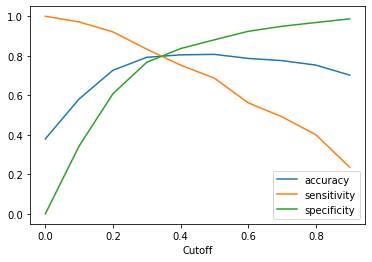

In [365]:
opt_cutoff(y_train, y_train_pred)

- From the plot, 0.35 seem to be the optimal cutoff value

### Lets do the precision recall tradeoff to get the optimal cutoff

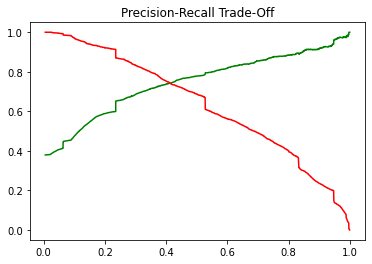

In [366]:
p, r, thresholds = precision_recall_curve(y_train, y_train_pred)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision-Recall Trade-Off')
plt.show()

#### Insight
- From this plot, the cutoff seems to be 0.4
- Let's check the model performance for both of these cutoff's 

### Model Performance for cutoff: 0.4 (from Precision Recall Tradeoff)

In [367]:
y_train_pred_point_4 = y_train_pred.apply(lambda x:1 if x>0.4 else 0)
mod_performance(y_train, y_train_pred_point_4)

Model Performance
_____________________________________________________
Accuracy Score: 0.8
Sensitivity/Recall: 0.75
Specificity: 0.84
Precision: 0.74
F1 Score: 0.7451829400303096


### Model Performance for cutoff: 0.35 (From Accuracy, Sensitivity and Specificity Graph)

In [368]:
y_train_pred_point_35 = y_train_pred.apply(lambda x:1 if x>0.35 else 0)
mod_performance(y_train, y_train_pred_point_35)

Model Performance
_____________________________________________________
Accuracy Score: 0.8
Sensitivity/Recall: 0.8
Specificity: 0.81
Precision: 0.71
F1 Score: 0.7541322314049588


#### Insight
- As Sensitivity and F1 score is high for cutoff point '0.35', lets choose this as the optimal cutoff value.

In [369]:
y_train_prob = y_train_pred.copy()
y_train_pred = y_train_pred_point_35.copy()

### ROC curve of the final model

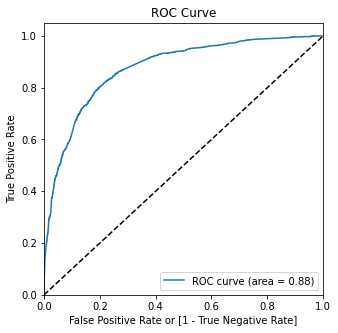

In [370]:
draw_roc(y_train, y_train_prob)

#### Insight 
- Area under the ROC curve is 0.88 which is good to go.

### Model Performance of the final model

In [371]:
mod_performance(y_train, y_train_pred)

Model Performance
_____________________________________________________
Accuracy Score: 0.8
Sensitivity/Recall: 0.8
Specificity: 0.81
Precision: 0.71
F1 Score: 0.7541322314049588


#### Train data has an:-
- accuracy score of 0.8
- Sensitivity: 0.8
- Specificity: 0.81
- Precision: 0.71
- F1 Score: 0.75

### Assigning the Lead Score and Predicted Values to the final Trained Data

In [372]:
final_trained_data = pd.DataFrame({'Record_ID':y_train_pred.index, 'Lead_Score':round(y_train_prob*100,2), 'Converted':y_train, 'Converted_Predicted':y_train_pred})
final_trained_data = final_trained_data.sort_values(by='Lead_Score', ascending=False)
final_trained_data

,Record_ID,Lead_Score,Converted,Converted_Predicted
2656,2656,99.96,1,1
8074,8074,99.95,1,1
3478,3478,99.95,1,1
7579,7579,99.91,1,1
8081,8081,99.88,1,1
...,...,...,...,...
8678,8678,0.72,0,0
6283,6283,0.71,0,0
7046,7046,0.64,0,0
7488,7488,0.56,0,0


## 8. Model Testing
### Considering the columns that was finalized in the model 9

In [373]:
X_test = X_test[X_train_rfe.columns]

In [374]:
# Test Data Information
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2583 entries, 377 to 1933
Data columns (total 8 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          2583 non-null   int64  
 1   Last Activity_SMS Sent                                2583 non-null   uint8  
 2   Last Activity_Olark Chat Conversation                 2583 non-null   uint8  
 3   Last Activity_Converted to Lead                       2583 non-null   uint8  
 4   Lead Source_Olark Chat                                2583 non-null   uint8  
 5   What is your current occupation_Working Professional  2583 non-null   uint8  
 6   Lead Origin_Lead Add Form                             2583 non-null   uint8  
 7   Total Time Spent on Website                           2583 non-null   float64
dtypes: float64(1), int64(1), uint8(6)
memory usage: 75.7 KB


In [375]:
# Test Data Shape
X_test.shape

(2583, 8)

In [376]:
# Test Data Description
X_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Do Not Email,2583.0,0.075494,0.264237,0.0,0.0,0.000000,0.000000,1.000000
Last Activity_SMS Sent,2583.0,0.301587,0.459036,0.0,0.0,0.000000,1.000000,1.000000
Last Activity_Olark Chat Conversation,2583.0,0.104917,0.306505,0.0,0.0,0.000000,0.000000,1.000000
Last Activity_Converted to Lead,2583.0,0.045683,0.208838,0.0,0.0,0.000000,0.000000,1.000000
Lead Source_Olark Chat,2583.0,0.193961,0.395475,0.0,0.0,0.000000,0.000000,1.000000
What is your current occupation_Working Professional,2583.0,0.080139,0.271561,0.0,0.0,0.000000,0.000000,1.000000
Lead Origin_Lead Add Form,2583.0,0.091367,0.288186,0.0,0.0,0.000000,0.000000,1.000000
Total Time Spent on Website,2583.0,0.202646,0.236545,0.0,0.0,0.098151,0.380282,0.979754


### Adding constant

In [377]:
X_test_sm = sm.add_constant(X_test)

### Fitting the logistic regression

In [378]:
logm = sm.GLM(y_test, X_test_sm, family=sm.families.Binomial()).fit()

### Getting the statistical summary

In [379]:
print(logm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 2583
Model:                            GLM   Df Residuals:                     2574
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1061.5
Date:                Mon, 20 Mar 2023   Deviance:                       2123.0
Time:                        03:06:29   Pearson chi2:                 3.74e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3969
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Prediction on the test data

In [380]:
y_test_prob = logm.predict(X_test_sm)
y_test_pred = y_test_prob.apply(lambda x:1 if x>0.35 else 0)

### Model Performance on test data

In [381]:
mod_performance(y_test, y_test_pred)

Model Performance
_____________________________________________________
Accuracy Score: 0.82
Sensitivity/Recall: 0.8
Specificity: 0.84
Precision: 0.75
F1 Score: 0.7711319822046465


#### Model Performance is good on test data.
- Accuracy Score: 0.82
- Sensitivity: 0.8
- Specificity: 0.84
- Precision: 0.75
- F1 Score: 0.77

### ROC Curve on test data

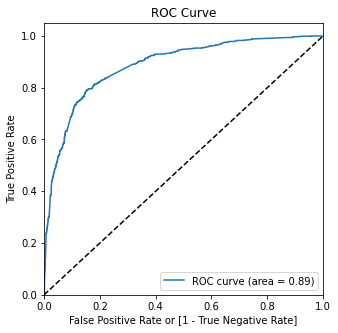

In [382]:
draw_roc(y_test, y_test_prob)

- Area under the ROC curve is 0.89.
- Hence, our model is good is with high accuracy score, sensitivity and ROC curve area.

### Assigning the lead score and prediced y_test values to the record

In [383]:
final_tested_data = pd.DataFrame({'Record_ID':y_test_pred.index, 'Lead_Score':round(y_test_prob*100,2), 'Converted':y_test, 'Converted_Predicted':y_test_pred})
final_tested_data = final_tested_data.sort_values(by='Lead_Score', ascending=False)
final_tested_data

,Record_ID,Lead_Score,Converted,Converted_Predicted
6383,6383,99.96,1,1
3428,3428,99.94,1,1
5921,5921,99.94,1,1
6751,6751,99.92,1,1
8063,8063,99.90,1,1
...,...,...,...,...
7586,7586,1.34,0,0
330,330,1.25,0,0
6588,6588,0.65,0,0
8614,8614,0.53,0,0


### Top predictors which are impacting the lead converstion rate are:-

In [384]:
logm.params.sort_values(ascending=False)

Total Time Spent on Website                             4.970793
Lead Origin_Lead Add Form                               4.263865
What is your current occupation_Working Professional    2.581852
Lead Source_Olark Chat                                  1.519152
Last Activity_SMS Sent                                  1.219479
Last Activity_Converted to Lead                        -1.380699
Do Not Email                                           -1.443185
Last Activity_Olark Chat Conversation                  -1.840576
const                                                  -2.531876
dtype: float64

## 9. Model Inference

#### __Features Used in the Final Model:-__ 'Do Not Email', 'Last Activity_SMS Sent', 'Last Activity_Olark Chat Conversation', 'Last Activity_Converted to Lead', 'Lead Source_Olark Chat', 'What is your current occupation_Working Professional', 'Lead Origin_Lead Add Form', 'Total Time Spent on Website'

#### __Optimal Cutoff:__ 0.35

#### __Trained model has an:-__
- Accuracy Score: 80%
- Sensitivity: 80%
- Specificity: 81%
- Precision: 71%
- F1 Score: 75%
- ROC Curve Area: 88%

#### __Tested model has an:-__
- Accuracy Score: 82%
- Sensitivity: 80%
- Specificity: 84%
- Precision: 75%
- F1 Score: 77%
- ROC Curve Area: 89%

#### __Top 3 predictors which are impacting the lead converstion rate are:-__
1. __Total Time Spent on Website:-__ How long the customer spend time on our website before he/she fills up the lead form
2. __Lead Origin_Lead Add Form:-__ Leads coming from the source 'Lead Add Form' tend to have high conversion rate. 
3. __What is your current occupation_Working Professional:-__ Working professionals have high impact in the lead conversion rate.

## 10. Summary (Recommendation)

### Sales team need to keep the following things in mind:-
- More Conversions are happening for Landng Page Submissions and Lead Add Form.
- More Conversions can be seen from the leads that came from sites like Google, Organic Search, Direct Traffic and Referrals.
- High conversions were seen through SMS and Email marketing leads.
- Mostly customers who worked in the Finance, HR, Marketing, Operations and Banking sector tend to convert more.
- Customers who have choosen the option of "Better Career Prospects" for the career outcome tend to convert more.
- Leads tend to get converted more who are likely to spend more time on website. If a customer spends more time on the website, he/she is researching a lot and is interested in the course.
- Try to reduce the bounce rate of the website as the customer engagement time increases, the chances of him/her getting converted will also be high.
- High importance needs to be given for the leads that came from Lead Add Form. Also this form can be used across key areas in order to generate qualifying leads.
- Sales team needs to focus on working professionals as they dont have any financial restrictions and also they tend to convert more by enrolling to the courses.
- Lead Score can be taken into consideration for giving the importance to each leads. Lead score having >0.35 tend to convert more. Model __accuracy score is 80%__ and hence can be relied.